In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw(x_axis, y_axis, label, color, x_label, y_label, title, lw):
    plt.figure(figsize=(15, 5))
    plt.grid(alpha=0.3)
    plt.style.use('dark_background')
    plt.plot(x_axis, y_axis, label=label, color=color, linewidth=lw)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.title(title, fontsize=30)
    plt.legend(loc='upper right')
    plt.show()

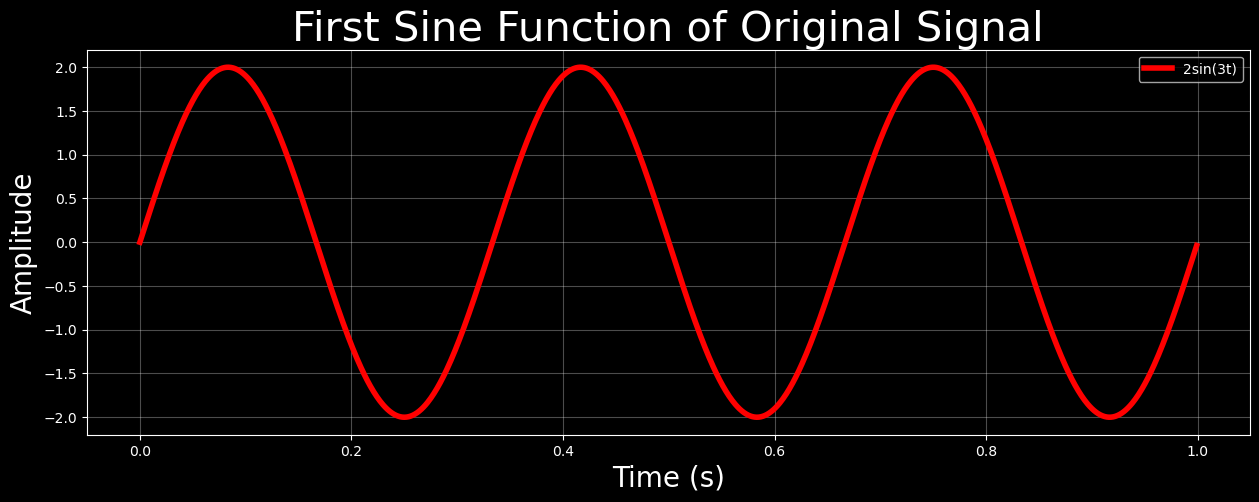

In [6]:
dt = 0.001
t = np.arange(0, 1, dt)
sin_3t = 2 * np.sin(2 * np.pi * 3 * t)

draw(x_axis = t, y_axis = sin_3t, label = "2sin(3t)", color = "r", x_label = 'Time (s)', y_label = "Amplitude", title = "First Sine Function of Original Signal", lw = 4)

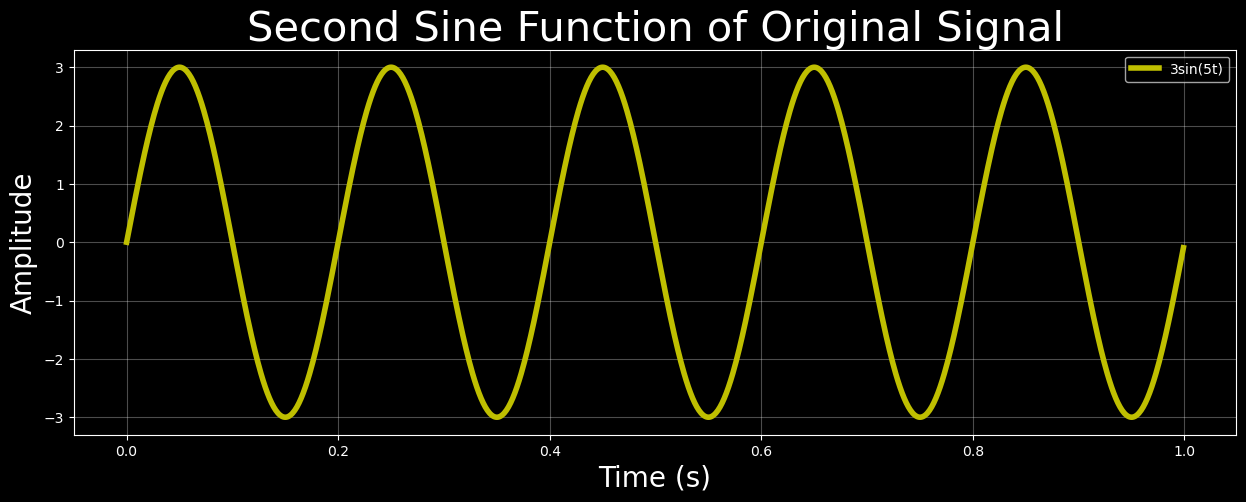

In [ ]:
sin_5t = 3 * np.sin(2 * np.pi * 5 * t)
draw(x_axis = t, y_axis = sin_5t, label = "3sin(5t)", color = "y", x_label = 'Time (s)', y_label = "Amplitude", title = "Second Sine Function of Original Signal", lw = 4)

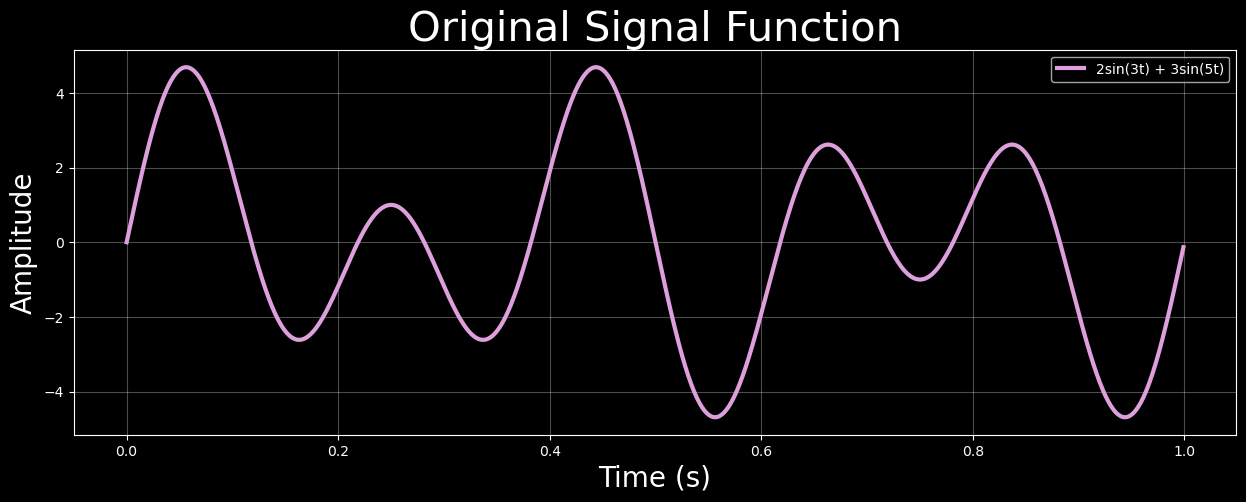

In [8]:
Original_Signal = sin_3t + sin_5t
draw(x_axis = t, y_axis = Original_Signal, label = "2sin(3t) + 3sin(5t)", color = "plum", x_label = 'Time (s)', y_label = "Amplitude", title = "Original Signal Function", lw = 3)

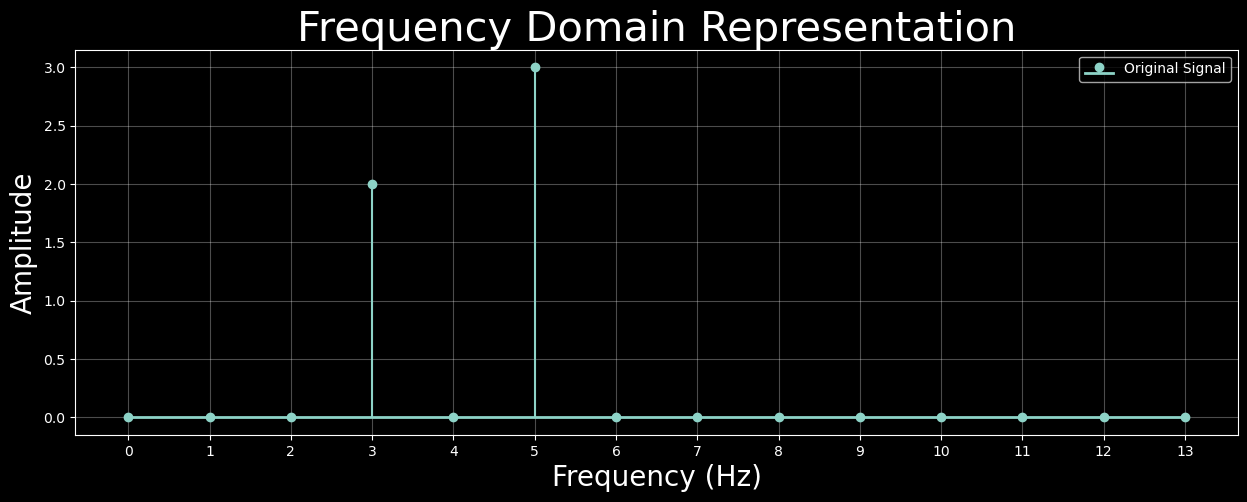

In [9]:
signal_fft = np.fft.fft(Original_Signal)
freqs = np.fft.fftfreq(len(Original_Signal), dt)

# Compute the magnitudes of the Fourier coefficients and normalize them
magnitudes = 2 * np.abs(signal_fft) / len(Original_Signal)

# Plot the frequency domain representation of the signal for the frequencies of interest
plt.figure(figsize=(15, 5))
plt.grid(alpha=0.3)
plt.xticks(np.arange(14))
plt.style.use('dark_background')
plt.title('Frequency Domain Representation', fontsize=30)
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.stem(freqs[:14], magnitudes[:14], linefmt='C0-', markerfmt='C0o', basefmt='C0-', label='Original Signal', use_line_collection=True)
plt.setp(plt.gca().get_lines(), linewidth=2)
plt.legend()
plt.savefig('fr_rep1.png')
plt.show()

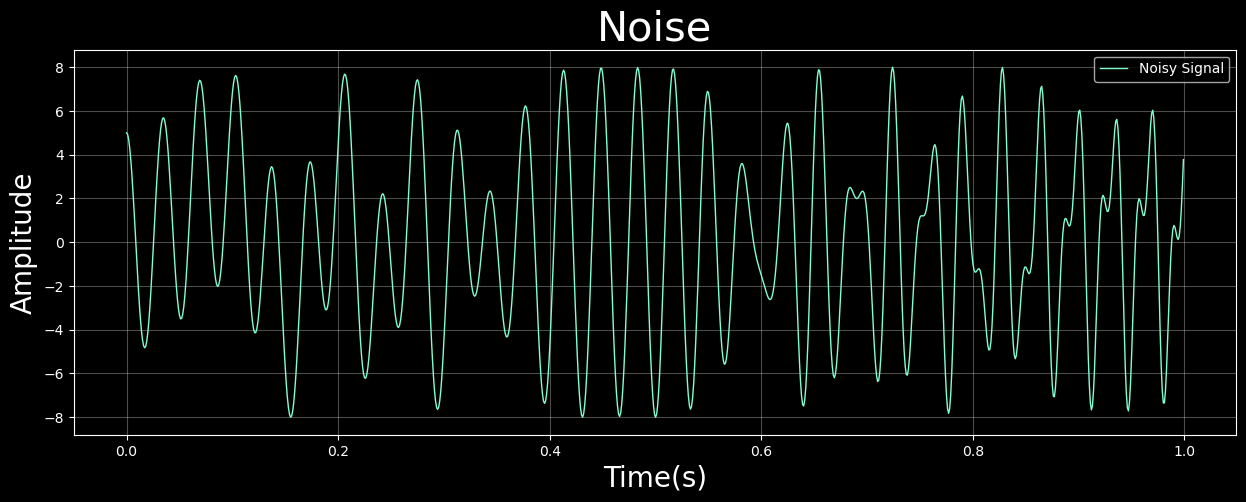

In [33]:
#Generate Noisy Signal
cos_29t = 5 * np.cos(2 * np.pi * 29 * t)
sin_31t = 3 * np.sin(2 * np.pi * 31 * t**2)


Noisy_Signal = cos_29t + sin_31t
draw(x_axis = t,y_axis = Noisy_Signal ,label="Noisy Signal",color="aquamarine", x_label = "Time(s)",y_label = "Amplitude", title="Noise", lw=1)


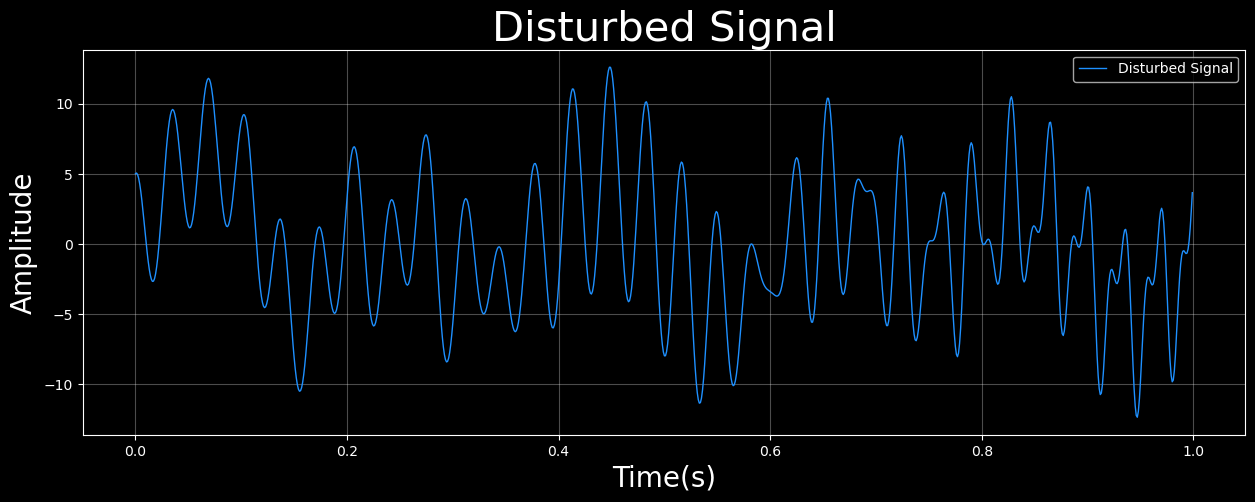

In [34]:
#Combined Signals to generate disturbed signal

Disturbed_Signal = Original_Signal + Noisy_Signal
draw(x_axis = t,y_axis =Disturbed_Signal ,label="Disturbed Signal",color="dodgerblue", x_label = "Time(s)",y_label = "Amplitude",title="Disturbed Signal", lw=1)

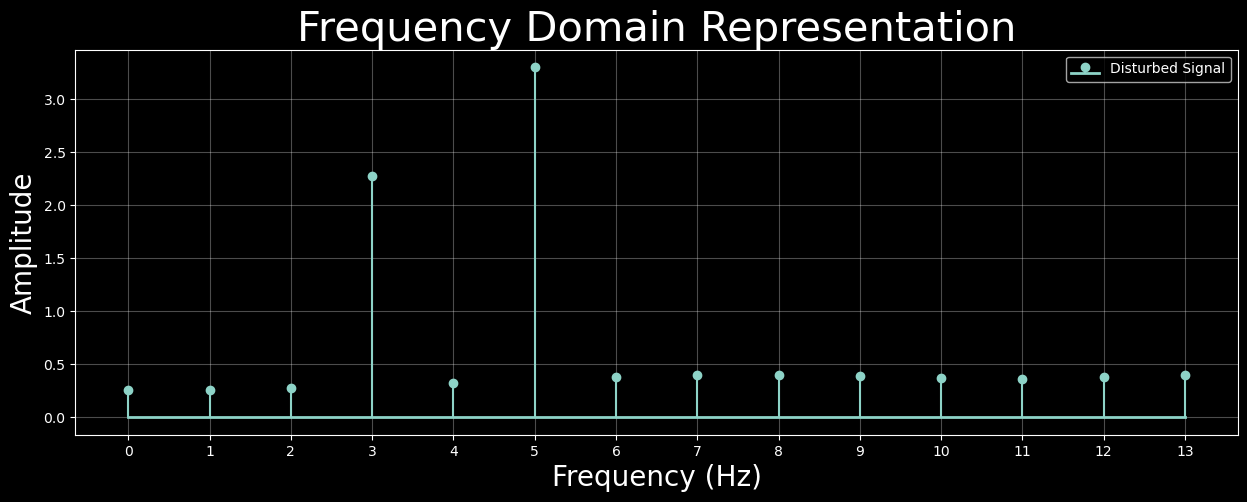

In [28]:
signal_fft = np.fft.fft(Disturbed_Signal)
freqs = np.fft.fftfreq(len(Disturbed_Signal), dt)
magnitudes = 2 * np.abs(signal_fft) / len(Disturbed_Signal)

plt.figure(figsize=(15, 5))
plt.grid(alpha=0.3)
plt.xticks(np.arange(14))
plt.style.use('dark_background')
plt.title('Frequency Domain Representation', fontsize=30)
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.stem(freqs[:14], magnitudes[:14], linefmt='C0-', markerfmt='C0o', basefmt='C0-', label='Disturbed Signal', use_line_collection=True)
plt.setp(plt.gca().get_lines(), linewidth=2)
plt.legend()
plt.savefig('fr_rep1.png')
plt.show()

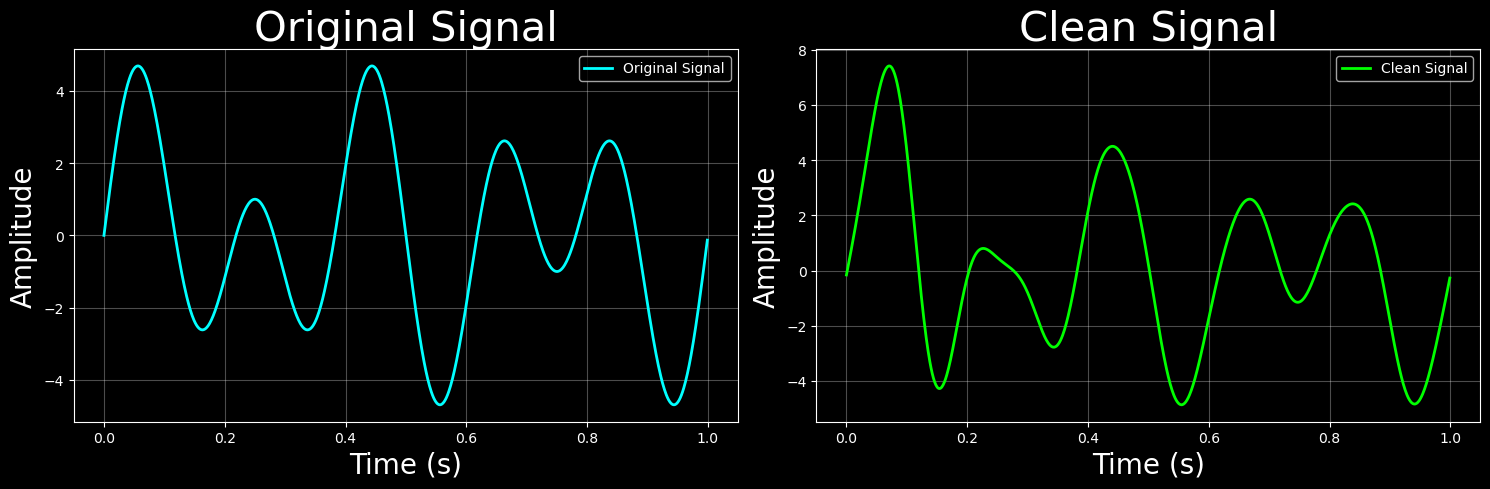

In [29]:
anti_noise_fft = np.zeros_like(signal_fft)
anti_noise_fft[np.abs(freqs) > 10] = -signal_fft[np.abs(freqs) > 10]
anti_noise_signal = np.fft.ifft(anti_noise_fft).real
Clean_Signal = Disturbed_Signal + anti_noise_signal

fig, axs = plt.subplots(1, 2, figsize=(15, 5))


axs[0].plot(t, Original_Signal, label='Original Signal', color='cyan', linewidth=2)
axs[0].grid(alpha=0.3)
axs[0].set_xlabel('Time (s)', fontsize=20)
axs[0].set_ylabel('Amplitude', fontsize=20)
axs[0].set_title('Original Signal', fontsize=30)
axs[0].legend()


axs[1].plot(t, Clean_Signal, label='Clean Signal', color='lime', linewidth=2)
axs[1].grid(alpha=0.3)
axs[1].set_xlabel('Time (s)', fontsize=20)
axs[1].set_ylabel('Amplitude', fontsize=20)
axs[1].set_title('Clean Signal', fontsize=30)
axs[1].legend()


plt.tight_layout()
plt.show()

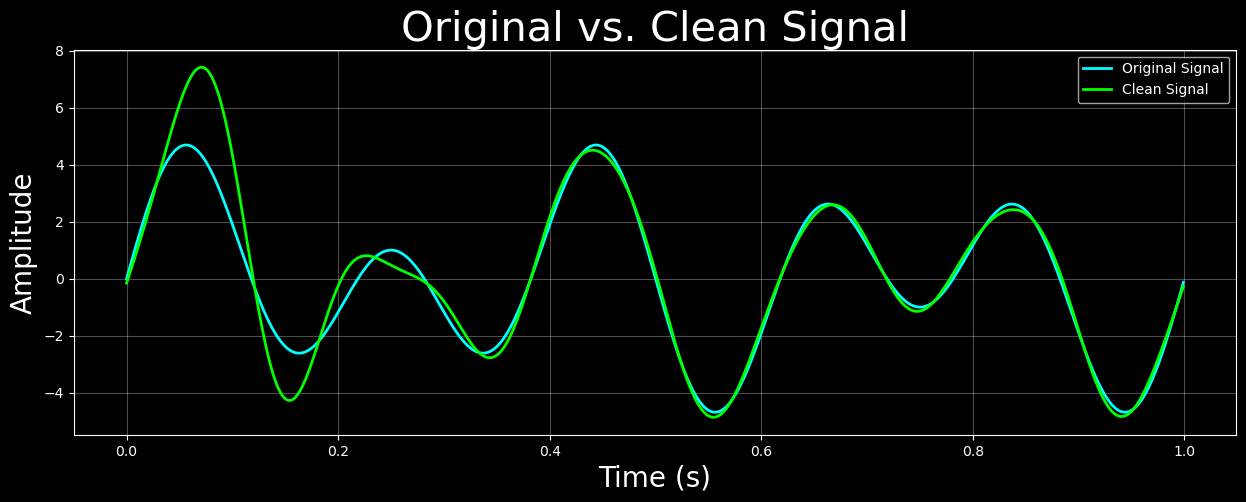

In [30]:
plt.figure(figsize=(15, 5))
plt.plot(t, Original_Signal, label='Original Signal', color='cyan', linewidth=2)
plt.plot(t, Clean_Signal, label='Clean Signal', color='lime', linewidth=2)
plt.grid(alpha=0.3)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.title('Original vs. Clean Signal', fontsize=30)
plt.legend()
plt.show()